<a href="https://colab.research.google.com/github/OjaswiniN/INT-248/blob/main/Tensor_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
TRUE_W=3.0
TRUE_b=2.0
NUM_EXAMPLES=1000
learning_rate=1.0
inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])
outputs=inputs*TRUE_W+TRUE_b+noise

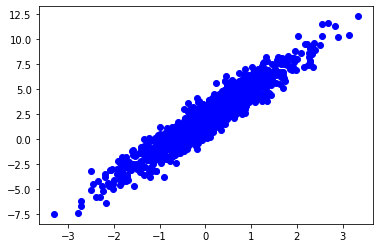

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs,outputs, c='b')

In [ ]:
class Model(object):
  def __init__(self):
    self.W=tf.Variable(5.0)
    self.b=tf.Variable(0.0)
  def __call__(self, x):
    return self.W * x + self.b
model=Model()
assert model(3.0).numpy()==15.0

In [ ]:
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y-predicted_y))

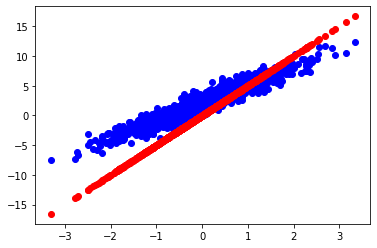

current loss: %1.6f% 9.08965


In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs,outputs, c='b')
plt.scatter(inputs, model(inputs),c='r')
plt.show()
print('current loss: %1.6f%', loss(model(inputs), outputs).numpy())

In [ ]:
def train(model, inputs, outputs,learning_rate ):
  with tf.GradientTape() as t:
    current_loss=loss(outputs,model(inputs))
  dW, db= t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate*dW)
  model.b.assign_sub(learning_rate*db)  
  

In [ ]:
model = Model()
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss=loss(outputs, model(inputs))
  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss = %2f' %(epoch, Ws[-1], bs[-1],current_loss))

Epoch  0: W=5.00 b=0.00, loss = 9.089650
Epoch  1: W=4.60 b=0.40, loss = 6.175256
Epoch  2: W=4.28 b=0.73, loss = 4.298257
Epoch  3: W=4.02 b=0.99, loss = 3.089355
Epoch  4: W=3.82 b=1.20, loss = 2.310730
Epoch  5: W=3.65 b=1.37, loss = 1.809225
Epoch  6: W=3.52 b=1.51, loss = 1.486203
Epoch  7: W=3.42 b=1.62, loss = 1.278138
Epoch  8: W=3.33 b=1.70, loss = 1.144115
Epoch  9: W=3.26 b=1.77, loss = 1.057785


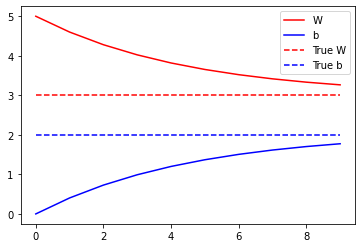

In [ ]:
plt.plot(epochs,Ws,'r',epochs,bs,'b')
plt.plot([TRUE_W]*len(epochs),'r--', [TRUE_b]*len(epochs),'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

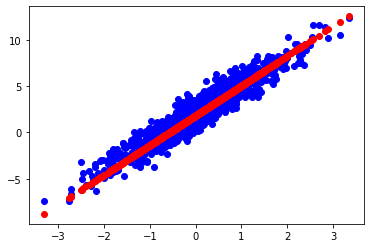

current loss: %1.6f% 1.0021746


In [ ]:
plt.scatter(inputs,outputs, c='b')
plt.scatter(inputs, model(inputs),c='r')
plt.show()
print('current loss: %1.6f%', loss(model(inputs), outputs).numpy())